In [2]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
from sklearn.model_selection import train_test_split
os.getcwd()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import operator

In [3]:
review = pd.read_csv('/Users/vamshi/Downloads/Archive/yelp_review.csv')
business = pd.read_csv('/Users/vamshi/Downloads/Archive/yelp_business.csv')

In [4]:
business.shape

(174567, 13)

In [5]:
review.head()

,review_id,user_id,business_id,stars,date,text,useful,funny,cool
0,vkVSCC7xljjrAI4UGfnKEQ,bv2nCi5Qv5vroFiqKGopiw,AEx2SYEUJmTxVVB18LlCwA,5,2016-05-28,Super simple place but amazing nonetheless. It...,0,0,0
1,n6QzIUObkYshz4dz2QRJTw,bv2nCi5Qv5vroFiqKGopiw,VR6GpWIda3SfvPC-lg9H3w,5,2016-05-28,Small unassuming place that changes their menu...,0,0,0
2,MV3CcKScW05u5LVfF6ok0g,bv2nCi5Qv5vroFiqKGopiw,CKC0-MOWMqoeWf6s-szl8g,5,2016-05-28,Lester's is located in a beautiful neighborhoo...,0,0,0
3,IXvOzsEMYtiJI0CARmj77Q,bv2nCi5Qv5vroFiqKGopiw,ACFtxLv8pGrrxMm6EgjreA,4,2016-05-28,Love coming here. Yes the place always needs t...,0,0,0
4,L_9BTb55X0GDtThi6GlZ6w,bv2nCi5Qv5vroFiqKGopiw,s2I_Ni76bjJNK9yG60iD-Q,4,2016-05-28,Had their chocolate almond croissant and it wa...,0,0,0


In [6]:
review.describe()

,stars,useful,funny,cool
count,5.261668e+06,5.261668e+06,5.261668e+06,5.261668e+06
mean,3.727739e+00,1.385085e+00,5.091961e-01,5.860917e-01
std,1.433593e+00,4.528727e+00,2.686168e+00,2.233706e+00
min,1.000000e+00,-1.000000e+00,0.000000e+00,-1.000000e+00
25%,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,5.000000e+00,2.000000e+00,0.000000e+00,1.000000e+00
max,5.000000e+00,3.364000e+03,1.481000e+03,1.105000e+03


In [7]:
review.dtypes

review_id      object
user_id        object
business_id    object
stars           int64
date           object
text           object
useful          int64
funny           int64
cool            int64
dtype: object

In [8]:
business_categories = pd.read_csv('/Users/vamshi/Downloads/business_categories.csv')

In [9]:
business_categories.head(20)

,Unnamed: 0,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
0,0,FYWN1wneV18bWNgQjJ2GNg,"""Dental by Design""",NaN,"""4855 E Warner Rd, Ste B9""",Ahwatukee,AZ,85044,33.330690,-111.978599,4.0,22,1,Medical
1,1,He-G7vWjzVUysIKrfNbPUQ,"""Stephen Szabo Salon""",NaN,"""3101 Washington Rd""",McMurray,PA,15317,40.291685,-80.104900,3.0,11,1,Shopping
2,2,KQPW8lFf1y5BT2MxiSZ3QA,"""Western Motor Vehicle""",NaN,"""6025 N 27th Ave, Ste 1""",Phoenix,AZ,85017,33.524903,-112.115310,1.5,18,1,Departments of Motor Vehicles;Public Services ...
3,3,8DShNS-LuFqpEWIp0HxijA,"""Sports Authority""",NaN,"""5000 Arizona Mills Cr, Ste 435""",Tempe,AZ,85282,33.383147,-111.964725,3.0,9,0,Shopping
4,4,PfOCPjBrlQAnz__NXj9h_w,"""Brick House Tavern + Tap""",NaN,"""581 Howe Ave""",Cuyahoga Falls,OH,44221,41.119535,-81.475690,3.5,116,1,Restaurants
5,5,o9eMRCWt5PkpLDE0gOPtcQ,"""Messina""",NaN,"""Richterstr. 11""",Stuttgart,BW,70567,48.727200,9.147950,4.0,5,1,Restaurants
6,6,kCoE3jvEtg6UVz5SOD3GVw,"""BDJ Realty""",Summerlin,"""2620 Regatta Dr, Ste 102""",Las Vegas,NV,89128,36.207430,-115.268460,4.0,5,1,Real Estate Services;Real Estate;Home Services...
7,7,OD2hnuuTJI9uotcKycxg1A,"""Soccer Zone""",NaN,"""7240 W Lake Mead Blvd, Ste 4""",Las Vegas,NV,89128,36.197484,-115.249660,1.5,9,1,Shopping
8,8,EsMcGiZaQuG1OOvL9iUFug,"""Any Given Sundae""",NaN,"""2612 Brandt School Rd""",Wexford,PA,15090,40.615102,-80.091349,5.0,15,1,Restaurants
9,9,TGWhGNusxyMaA4kQVBNeew,"""Detailing Gone Mobile""",NaN,"""""",Henderson,NV,89014,36.055825,-115.046350,5.0,7,1,Automobile


In [10]:
business_categories.shape

(174564, 14)

In [22]:
counter = 0
for key,value in business_categories.iterrows():
    if ';' in value['categories']:
        business_categories = business_categories.drop([key])
        #counter+=1
    #if counter == 100:
        #break

In [23]:
business_categories.head(20)

,Unnamed: 0,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
0,0,FYWN1wneV18bWNgQjJ2GNg,"""Dental by Design""",NaN,"""4855 E Warner Rd, Ste B9""",Ahwatukee,AZ,85044,33.330690,-111.978599,4.0,22,1,Medical
1,1,He-G7vWjzVUysIKrfNbPUQ,"""Stephen Szabo Salon""",NaN,"""3101 Washington Rd""",McMurray,PA,15317,40.291685,-80.104900,3.0,11,1,Shopping
3,3,8DShNS-LuFqpEWIp0HxijA,"""Sports Authority""",NaN,"""5000 Arizona Mills Cr, Ste 435""",Tempe,AZ,85282,33.383147,-111.964725,3.0,9,0,Shopping
4,4,PfOCPjBrlQAnz__NXj9h_w,"""Brick House Tavern + Tap""",NaN,"""581 Howe Ave""",Cuyahoga Falls,OH,44221,41.119535,-81.475690,3.5,116,1,Restaurants
5,5,o9eMRCWt5PkpLDE0gOPtcQ,"""Messina""",NaN,"""Richterstr. 11""",Stuttgart,BW,70567,48.727200,9.147950,4.0,5,1,Restaurants
7,7,OD2hnuuTJI9uotcKycxg1A,"""Soccer Zone""",NaN,"""7240 W Lake Mead Blvd, Ste 4""",Las Vegas,NV,89128,36.197484,-115.249660,1.5,9,1,Shopping
8,8,EsMcGiZaQuG1OOvL9iUFug,"""Any Given Sundae""",NaN,"""2612 Brandt School Rd""",Wexford,PA,15090,40.615102,-80.091349,5.0,15,1,Restaurants
9,9,TGWhGNusxyMaA4kQVBNeew,"""Detailing Gone Mobile""",NaN,"""""",Henderson,NV,89014,36.055825,-115.046350,5.0,7,1,Automobile
10,10,XOSRcvtaKc_Q5H1SAzN20A,"""East Coast Coffee""",NaN,"""737 West Pike St""",Houston,PA,15342,40.241548,-80.212815,4.5,3,0,Restaurants
12,12,xcgFnd-MwkZeO5G2HQ0gAQ,"""T & T Bakery and Cafe""",Markham Village,"""35 Main Street N""",Markham,ON,L3P 1X3,43.875177,-79.260153,4.0,38,1,Restaurants


In [34]:
business_categories.to_csv(r'/Users/vamshi/Downloads/bt1.csv', sep=',', encoding='utf-8', header='true')

# Applying Multinomial Naive Bayes

In [169]:
import pandas as pd

In [170]:
bt1 = pd.read_csv('/Users/vamshi/Downloads/bt1.csv')

In [171]:
bt1.head(10)

,Unnamed: 0,Unnamed: 0.1,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
0,0,0,FYWN1wneV18bWNgQjJ2GNg,"""Dental by Design""",NaN,"""4855 E Warner Rd, Ste B9""",Ahwatukee,AZ,85044,33.330690,-111.978599,4.0,22,1,Medical
1,1,1,He-G7vWjzVUysIKrfNbPUQ,"""Stephen Szabo Salon""",NaN,"""3101 Washington Rd""",McMurray,PA,15317,40.291685,-80.104900,3.0,11,1,Shopping
2,3,3,8DShNS-LuFqpEWIp0HxijA,"""Sports Authority""",NaN,"""5000 Arizona Mills Cr, Ste 435""",Tempe,AZ,85282,33.383147,-111.964725,3.0,9,0,Shopping
3,4,4,PfOCPjBrlQAnz__NXj9h_w,"""Brick House Tavern + Tap""",NaN,"""581 Howe Ave""",Cuyahoga Falls,OH,44221,41.119535,-81.475690,3.5,116,1,Restaurants
4,5,5,o9eMRCWt5PkpLDE0gOPtcQ,"""Messina""",NaN,"""Richterstr. 11""",Stuttgart,BW,70567,48.727200,9.147950,4.0,5,1,Restaurants
5,7,7,OD2hnuuTJI9uotcKycxg1A,"""Soccer Zone""",NaN,"""7240 W Lake Mead Blvd, Ste 4""",Las Vegas,NV,89128,36.197484,-115.249660,1.5,9,1,Shopping
6,8,8,EsMcGiZaQuG1OOvL9iUFug,"""Any Given Sundae""",NaN,"""2612 Brandt School Rd""",Wexford,PA,15090,40.615102,-80.091349,5.0,15,1,Restaurants
7,9,9,TGWhGNusxyMaA4kQVBNeew,"""Detailing Gone Mobile""",NaN,"""""",Henderson,NV,89014,36.055825,-115.046350,5.0,7,1,Automobile
8,10,10,XOSRcvtaKc_Q5H1SAzN20A,"""East Coast Coffee""",NaN,"""737 West Pike St""",Houston,PA,15342,40.241548,-80.212815,4.5,3,0,Restaurants
9,12,12,xcgFnd-MwkZeO5G2HQ0gAQ,"""T & T Bakery and Cafe""",Markham Village,"""35 Main Street N""",Markham,ON,L3P 1X3,43.875177,-79.260153,4.0,38,1,Restaurants


In [172]:
def round_off(a):
    if a==1.5:
        return 2
    if a==2.5:
        return 3
    if a==3.5:
        return 4
    if a==4.5:
        return 5
    else:
        return a
    
bt1['stars'] = bt1['stars'].apply(round_off)

In [173]:
bt1 = bt1.drop(columns = ['business_id', 'name', 'address','Unnamed: 0','Unnamed: 0.1'])

In [174]:
bt1.head()
bt1 = bt1.dropna(axis=0)

In [175]:
bt1.head()

,neighborhood,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
9,Markham Village,Markham,ON,L3P 1X3,43.875177,-79.260153,4.0,38,1,Restaurants
11,Uptown,Charlotte,NC,28202,35.221647,-80.839345,4.0,7,1,Restaurants
12,Yonge and Eglinton,Toronto,ON,M4P 2H6,43.711399,-79.399339,3.0,12,0,Restaurants
17,Liberty Village,Toronto,ON,M6K 3S3,43.639863,-79.419533,4.0,21,1,Restaurants
21,The Danforth,Toronto,ON,M4J 1N4,43.682867,-79.326964,3.0,7,1,Services


In [176]:
bt1['review_count'] = bt1['review_count'].astype('float64')
bt1['latitude'] = bt1['latitude'].astype('float64')
bt1['longitude'] = bt1['longitude'].astype('float64')

In [177]:
bt1['neighborhood'] = bt1.neighborhood.astype("category").cat.codes
bt1['city'] = bt1.city.astype("category").cat.codes
bt1['state'] = bt1.state.astype("category").cat.codes
bt1['postal_code'] = bt1.postal_code.astype("category").cat.codes
bt1['stars'] = bt1.stars.astype("category").cat.codes
bt1['categories'] = bt1.categories.astype("category").cat.codes
# business1['MaritalStatus'] = business1.MaritalStatus.astype("category").cat.codes
# business1['Occupation'] = business1.Occupation.astype("category").cat.codes
# business1['Relationship'] = business1.Relationship.astype("category").cat.codes

In [178]:
bt1.head()

,neighborhood,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
9,203,107,15,4270,43.875177,-79.260153,3,38.0,1,16
11,365,28,11,58,35.221647,-80.839345,3,7.0,1,16
12,398,212,15,6556,43.711399,-79.399339,2,12.0,0,16
17,192,212,15,8558,43.639863,-79.419533,3,21.0,1,16
21,342,212,15,6255,43.682867,-79.326964,2,7.0,1,17


In [179]:
bt1['stars'].unique()

array([3, 2, 4, 1, 0])

In [180]:
def convert_positive(a):
    return abs(a)

bt1['longitude'] = bt1['longitude'].apply(convert_positive)


In [181]:
from sklearn.naive_bayes import MultinomialNB

In [182]:
x_values = bt1.drop(['stars'], axis=1)

In [183]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_values, 
                                                    bt1[['stars']], 
                                                    test_size=0.2, 
                                                    random_state=1)

In [184]:
multinb_clf = MultinomialNB(#class_prior = [0.6, 0.20, 0.50, 0.20, 0.12]
                           )

In [185]:
model = multinb_clf.fit(x_train, y_train)

//anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [186]:
y_pred_df = y_test.copy()

In [187]:
y_pred_df['CLASS_PREDS'] = model.predict(x_test)

In [188]:
pd.crosstab(y_pred_df['stars'], y_pred_df['CLASS_PREDS'],
            rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,2,3,4,All
True,,,,,,
0,35,34,0,0,76,145
1,130,222,5,4,445,806
2,319,739,111,51,1584,2804
3,406,1091,276,249,2941,4963
4,277,474,40,54,2192,3037
All,1167,2560,432,358,7238,11755


In [189]:
mnb_df = pd.DataFrame(model.predict_proba(x_test))
mnb_df.columns = ['prob' + str(col) for col in mnb_df.columns]
mnb_df.head()

,prob0,prob1,prob2,prob3,prob4
0,1.678608e-26,6.786746e-05,9.999321e-01,1.543521e-22,8.659890e-95
1,8.136091e-01,1.863909e-01,1.766991e-09,1.840942e-29,8.625546e-56
2,1.199424e-316,5.915780e-170,5.443135e-69,1.000000e+00,7.071795e-75
3,1.138146e-35,5.908048e-37,6.530391e-37,1.078235e-30,1.000000e+00
4,2.944623e-115,7.260928e-103,1.833353e-89,3.143741e-64,1.000000e+00


In [190]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

confusion_matrix(y_pred_df['stars'], y_pred_df['CLASS_PREDS'])

array([[  35,   34,    0,    0,   76],
       [ 130,  222,    5,    4,  445],
       [ 319,  739,  111,   51, 1584],
       [ 406, 1091,  276,  249, 2941],
       [ 277,  474,   40,   54, 2192]])

In [191]:
accuracy_score(y_pred_df['stars'],  y_pred_df['CLASS_PREDS'])

0.2389621437686091

# Applying Multinomial Logistic Regression

In [192]:
from sklearn.linear_model import LogisticRegression
mnlr = LogisticRegression(random_state=0, multi_class='multinomial', solver='newton-cg', penalty = 'l2',
                         C = 2, max_iter = 100)

In [193]:
mnlr_model = mnlr.fit(x_train, y_train)

//anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
//anaconda3/lib/python3.7/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


In [194]:
y_test_mnlr = y_test.copy()
y_test_mnlr.head()

,stars
115083,2
77300,3
1229,3
92173,4
73531,4


In [195]:
y_test_mnlr['MNLR_CLASS_PREDS'] = mnlr_model.predict(x_test)
y_test_mnlr.shape

(11755, 2)

In [196]:
accuracy_score(y_test_mnlr['stars'],  y_test_mnlr['MNLR_CLASS_PREDS'])

0.4361548277328796

# Applying LIGHTGBM

In [215]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2, random_state = 1)

In [216]:
import lightgbm as lgb

In [217]:
lgb_mort_train = lgb.Dataset(x_train, y_train)
lgb_val_train = lgb.Dataset(x_val, y_val)

In [218]:
lgb_params = {
    'boosting_type': 'gbdt',
    'objective': 'multiclass',
    'metric': 'multi_logloss',
    'max_depth' : 3,
    'num_class':5,
    'learning_rate': 0.1,
    'early_stopping_round' : 10,
   
}

In [219]:
lgb_gbm = lgb.train(params = lgb_params, train_set = lgb_mort_train,
                num_boost_round = 100, valid_sets = [lgb_val_train, lgb_mort_train],
               valid_names = ['Evaluation', 'Train'])

//anaconda3/lib/python3.7/site-packages/lightgbm/engine.py:123: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	Train's multi_logloss: 1.27672	Evaluation's multi_logloss: 1.28297
Training until validation scores don't improve for 10 rounds.
[2]	Train's multi_logloss: 1.26903	Evaluation's multi_logloss: 1.27528
[3]	Train's multi_logloss: 1.2624	Evaluation's multi_logloss: 1.26853
[4]	Train's multi_logloss: 1.25651	Evaluation's multi_logloss: 1.26277
[5]	Train's multi_logloss: 1.25132	Evaluation's multi_logloss: 1.2577
[6]	Train's multi_logloss: 1.24676	Evaluation's multi_logloss: 1.25309
[7]	Train's multi_logloss: 1.24265	Evaluation's multi_logloss: 1.24901
[8]	Train's multi_logloss: 1.23903	Evaluation's multi_logloss: 1.24546
[9]	Train's multi_logloss: 1.23569	Evaluation's multi_logloss: 1.24212
[10]	Train's multi_logloss: 1.23249	Evaluation's multi_logloss: 1.23899
[11]	Train's multi_logloss: 1.22967	Evaluation's multi_logloss: 1.23613
[12]	Train's multi_logloss: 1.22714	Evaluation's multi_logloss: 1.23365
[13]	Train's multi_logloss: 1.22482	Evaluation's multi_logloss: 1.23136
[14]	Train's 

In [220]:
y_pred_df_test = y_test.copy()
y_pred_df_train = y_train.copy()

In [221]:
y_probs_train = lgb_gbm.predict(x_train)
y_probs_test = lgb_gbm.predict(x_test)

In [222]:
y_probs_train.shape

(30089, 5)

In [223]:
lgb_probs_train = pd.DataFrame(lgb_gbm.predict(x_train))
lgb_probs_train.columns = ['prob' + str(col) for col in lgb_probs_train.columns]
lgb_probs_train.head()

lgb_probs_test = pd.DataFrame(lgb_gbm.predict(x_test))
lgb_probs_test.columns = ['prob' + str(col) for col in lgb_probs_test.columns]
lgb_probs_test.head()

,prob0,prob1,prob2,prob3,prob4
0,0.000231,0.018464,0.321607,0.586189,0.073509
1,0.011514,0.089829,0.284539,0.396579,0.217538
2,0.000190,0.005340,0.122750,0.790666,0.081054
3,0.074343,0.123039,0.203978,0.267645,0.330995
4,0.031419,0.075544,0.199950,0.369361,0.323726


In [224]:
y_pred_df_test['LG1'] = np.where(y_pred_df_test['stars'] == 0, 1, 0)
y_pred_df_test['LG2'] = np.where(y_pred_df_test['stars'] == 1, 1, 0)
y_pred_df_test['LG3'] = np.where(y_pred_df_test['stars'] == 2, 1, 0)
y_pred_df_test['LG4'] = np.where(y_pred_df_test['stars'] == 3, 1, 0)
y_pred_df_test['LG5'] = np.where(y_pred_df_test['stars'] == 4, 1, 0)

y_pred_df_train['LG1'] = np.where(y_pred_df_train['stars'] == 0, 1, 0)
y_pred_df_train['LG2'] = np.where(y_pred_df_train['stars'] == 1, 1, 0)
y_pred_df_train['LG3'] = np.where(y_pred_df_train['stars'] == 2, 1, 0)
y_pred_df_train['LG4'] = np.where(y_pred_df_train['stars'] == 3, 1, 0)
y_pred_df_train['LG5'] = np.where(y_pred_df_train['stars'] == 4, 1, 0)


# TRAIN ROC

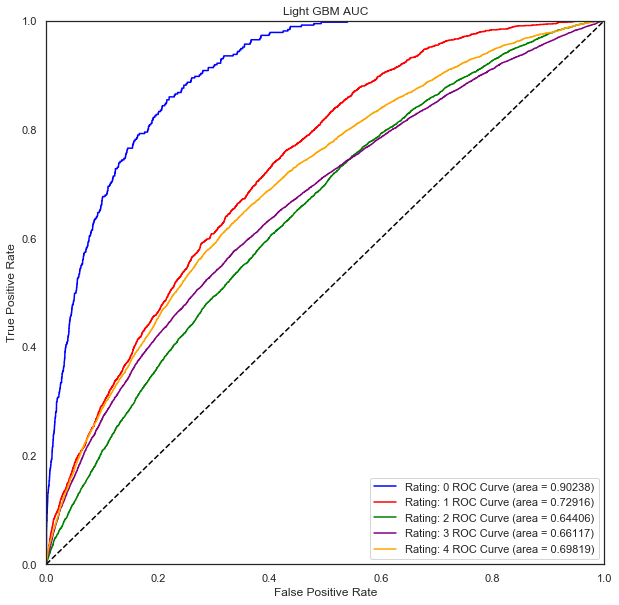

In [225]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

plt.plot(roc_curve(y_pred_df_train['LG1'], lgb_probs_train['prob0'])[0],roc_curve(y_pred_df_train['LG1'], lgb_probs_train['prob0'])[1], 
         color = 'blue', label='Rating: 0 ROC Curve (area = %0.5f)' % roc_auc_score(y_pred_df_train['LG1'], lgb_probs_train['prob0']))

plt.plot(roc_curve(y_pred_df_train['LG2'], lgb_probs_train['prob1'])[0],roc_curve(y_pred_df_train['LG2'], lgb_probs_train['prob1'])[1], 
         color = 'red', label='Rating: 1 ROC Curve (area = %0.5f)' % roc_auc_score(y_pred_df_train['LG2'], lgb_probs_train['prob1']))

plt.plot(roc_curve(y_pred_df_train['LG3'], lgb_probs_train['prob2'])[0],roc_curve(y_pred_df_train['LG3'], lgb_probs_train['prob2'])[1], 
         color = 'green', label='Rating: 2 ROC Curve (area = %0.5f)' % roc_auc_score(y_pred_df_train['LG3'], lgb_probs_train['prob2']))

plt.plot(roc_curve(y_pred_df_train['LG4'], lgb_probs_train['prob3'])[0],roc_curve(y_pred_df_train['LG4'], lgb_probs_train['prob3'])[1], 
         color = 'purple', label='Rating: 3 ROC Curve (area = %0.5f)' % roc_auc_score(y_pred_df_train['LG4'], lgb_probs_train['prob3']))

plt.plot(roc_curve(y_pred_df_train['LG5'], lgb_probs_train['prob4'])[0],roc_curve(y_pred_df_train['LG5'], lgb_probs_train['prob4'])[1], 
         color = 'orange', label='Rating: 4 ROC Curve (area = %0.5f)' % roc_auc_score(y_pred_df_train['LG5'], lgb_probs_train['prob4']))



plt.plot([0, 2], [0, 2], color='black', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Light GBM AUC')
plt.legend()
plt.show()
sns.set(style='white', rc={'figure.figsize':(10,10)})

# TEST ROC

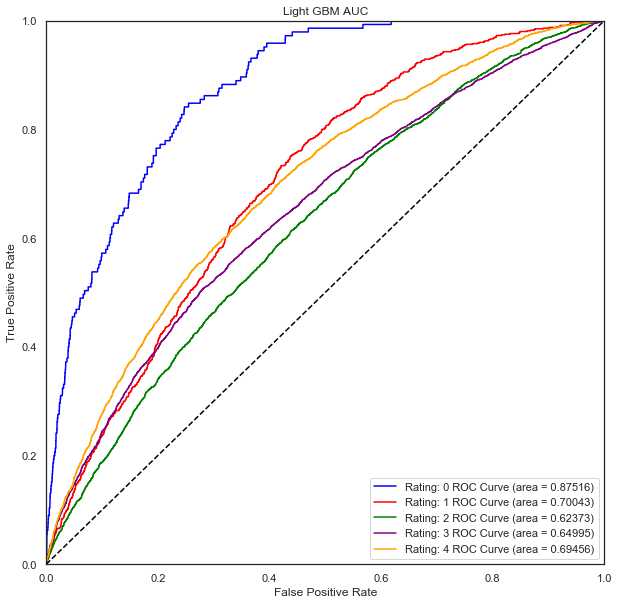

In [226]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

plt.plot(roc_curve(y_pred_df_test['LG1'], lgb_probs_test['prob0'])[0],roc_curve(y_pred_df_test['LG1'], lgb_probs_test['prob0'])[1], 
         color = 'blue', label='Rating: 0 ROC Curve (area = %0.5f)' % roc_auc_score(y_pred_df_test['LG1'], lgb_probs_test['prob0']))

plt.plot(roc_curve(y_pred_df_test['LG2'], lgb_probs_test['prob1'])[0],roc_curve(y_pred_df_test['LG2'], lgb_probs_test['prob1'])[1], 
         color = 'red', label='Rating: 1 ROC Curve (area = %0.5f)' % roc_auc_score(y_pred_df_test['LG2'], lgb_probs_test['prob1']))

plt.plot(roc_curve(y_pred_df_test['LG3'], lgb_probs_test['prob2'])[0],roc_curve(y_pred_df_test['LG3'], lgb_probs_test['prob2'])[1], 
         color = 'green', label='Rating: 2 ROC Curve (area = %0.5f)' % roc_auc_score(y_pred_df_test['LG3'], lgb_probs_test['prob2']))

plt.plot(roc_curve(y_pred_df_test['LG4'], lgb_probs_test['prob3'])[0],roc_curve(y_pred_df_test['LG4'], lgb_probs_test['prob3'])[1], 
         color = 'purple', label='Rating: 3 ROC Curve (area = %0.5f)' % roc_auc_score(y_pred_df_test['LG4'], lgb_probs_test['prob3']))

plt.plot(roc_curve(y_pred_df_test['LG5'], lgb_probs_test['prob4'])[0],roc_curve(y_pred_df_test['LG5'], lgb_probs_test['prob4'])[1], 
         color = 'orange', label='Rating: 4 ROC Curve (area = %0.5f)' % roc_auc_score(y_pred_df_test['LG5'], lgb_probs_test['prob4']))



plt.plot([0, 2], [0, 2], color='black', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Light GBM AUC')
plt.legend()
plt.show()
sns.set(style='white', rc={'figure.figsize':(10,10)})

# SHAP & LIME

In [209]:
import shap

In [210]:
shap_values = shap.TreeExplainer(lgb_gbm).shap_values(x_val)

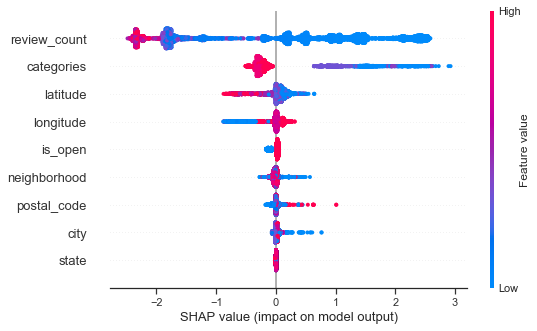

In [211]:
shap.summary_plot(shap_values[0], x_val)

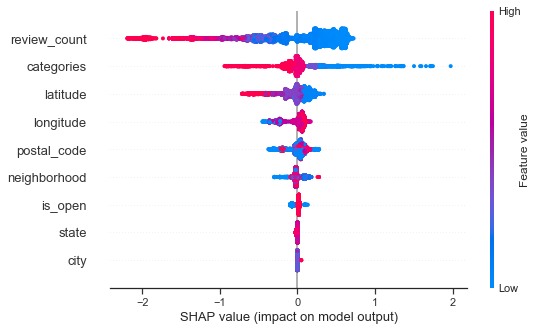

In [212]:
shap.summary_plot(shap_values[1], x_val)

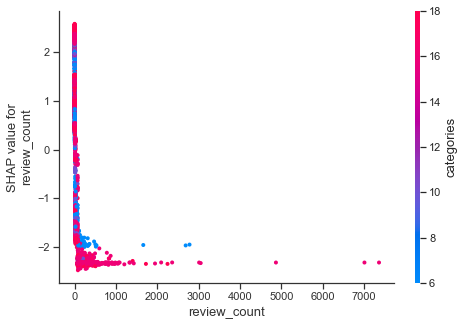

In [213]:
shap.dependence_plot("review_count", shap_values[0], x_val)

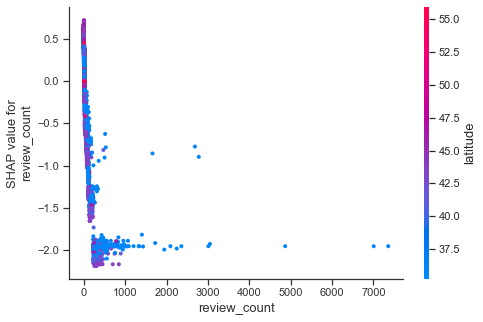

In [214]:
shap.dependence_plot("review_count", shap_values[1], x_val)

In [ ]:
#shap_values = shap.TreeExplainer(lgb_gbm).shap_values(x_val)

In [242]:
import xgboost as xgb

In [243]:
bst = xgb.XGBClassifier(max_depth = 3,
                        learning_rate = 0.35,
                        objective='multiclass',
                        eval_metric = 'multi_logloss',
                       #n_estimators = ?
                       #, max_delta_step = 
                       #, subsample = 
                       #, colsample_bytree =
                       #, colsample_bylevel =
                       #, colsamples_bynode =
                       #, reg_alpha =
                       #, reg_lambda =
                       #, scale_pos_weight =
                       )

In [244]:
bst.fit(x_train, y_train, eval_metric = 'auc', verbose = True, eval_set = [(x_val, y_val)],
       early_stopping_rounds = 20)

XGBoostError: [15:53:46] src/metric/rank_metric.cc:150: Check failed: preds.Size() == info.labels_.Size() (37615 vs. 7523) : label size predict size not match
Stack trace:
  [bt] (0) 1   libxgboost.dylib                    0x0000001ab1e22469 dmlc::LogMessageFatal::~LogMessageFatal() + 57
  [bt] (1) 2   libxgboost.dylib                    0x0000001ab1e9c6f5 xgboost::metric::EvalAuc::Eval(xgboost::HostDeviceVector<float> const&, xgboost::MetaInfo const&, bool) + 597
  [bt] (2) 3   libxgboost.dylib                    0x0000001ab1e1ec42 xgboost::LearnerImpl::EvalOneIter(int, std::__1::vector<xgboost::DMatrix*, std::__1::allocator<xgboost::DMatrix*> > const&, std::__1::vector<std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char> >, std::__1::allocator<std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char> > > > const&) + 1490
  [bt] (3) 4   libxgboost.dylib                    0x0000001ab1e3f602 XGBoosterEvalOneIter + 642
  [bt] (4) 5   libffi.6.dylib                      0x000000010d171884 ffi_call_unix64 + 76
  [bt] (5) 6   ???                                 0x00007ffee45edc70 0x0 + 140732729842800



In [ ]:
xgb_train_probs = bst.predict_proba(x_train)
xgb_test_probs = bst.predict_proba(x_test)

In [ ]:
xgb_train_prob_cols = ['class', 'proba']

xgb_preds_train = pd.DataFrame(xgb_train_probs, columns=xgb_train_prob_cols)
xgb_preds_test = pd.DataFrame(xgb_test_probs, columns=xgb_train_prob_cols)

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_train, xgb_preds_train['proba'])
metrics.auc(fpr, tpr)

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, xgb_preds_test['proba'])
metrics.auc(fpr, tpr)

In [245]:
xgb_shap_explainer = shap.TreeExplainer(lgb_gbm)

In [246]:
xgb_shap_vals_train = xgb_shap_explainer.shap_values(x_train)

In [254]:
xgb_shap_vals_test = xgb_shap_explainer.shap_values(x_test)
#xgb_shap_vals_test.head()
len(xgb_shap_explainer.expected_value)

5

In [256]:
xgb_shap_vals_train[0][0:200].shape

(200, 9)

In [270]:
# Explaining and instance
shap.initjs()
shap.force_plot(xgb_shap_explainer.expected_value[0], xgb_shap_vals_train[0][0:500], x_train[0:500])